In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import helper_functions as hp
import gc

from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

In [12]:
segmented_naip_images_tif, segmented_naip_new_labels = hp.segmented_dataset_reader('naip_2018_chips_128m_3class_128stride_segment')
segmented_naip_images_tif = segmented_naip_images_tif[:,:,:,0:3]
segmented_naip_new_labels = segmented_naip_new_labels[:,:,:,0]

reading in 23811 images


In [13]:
print(segmented_naip_new_labels.shape)
print(segmented_naip_new_labels.dtype)
print(segmented_naip_images_tif.shape)
print(segmented_naip_images_tif.dtype)

(23811, 128, 128)
uint8
(23811, 128, 128, 3)
float32


In [14]:
print(np.unique(segmented_naip_new_labels, return_counts=True))

(array([0, 1, 2, 3], dtype=uint8), array([104307410,  83131321,  70915201, 131765492], dtype=int64))


0.78039217 0.019607844
float32
(128, 128, 3)


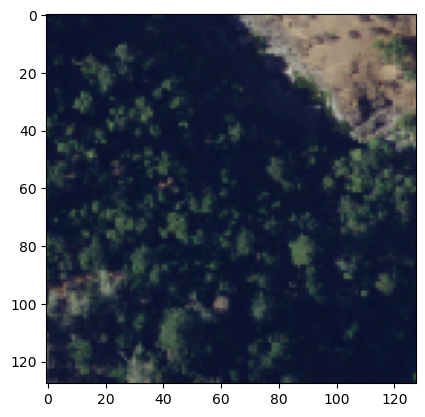

In [15]:
img = segmented_naip_images_tif[200]
print(img.max(),img.min())
print(img.dtype)
print(img.shape)
plt.imshow(img)

(128, 128)
[0 1 2 3]
3 0
uint8


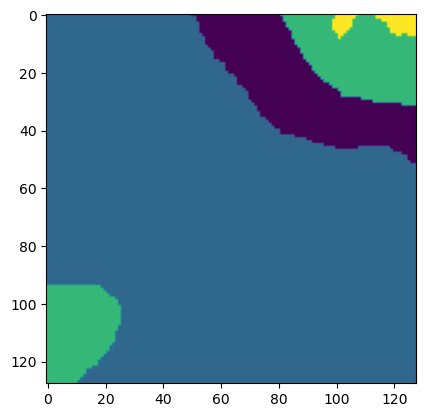

In [16]:
lbl = segmented_naip_new_labels[200]
print(lbl.shape)
print(np.unique(lbl))
print(lbl.max(),lbl.min())
print(lbl.dtype)
plt.imshow(lbl)

In [17]:
train_images, test_images, train_labels, test_labels = train_test_split(segmented_naip_images_tif, segmented_naip_new_labels, test_size=.25, shuffle=True)
print(train_images.shape,train_labels.shape)

(17858, 128, 128, 3) (17858, 128, 128)


In [18]:
del segmented_naip_images_tif
del segmented_naip_new_labels
print(train_labels.dtype)
print(train_images.dtype)

uint8
float32


In [20]:
#All my callback are called here
r_lr = hp.reduce_lr()
e_stop = hp.early_stop()
callbacks = [r_lr,e_stop]
gc.collect()

1949

In [35]:
keras.backend.clear_session()
model = hp.build_unet_model()
model.summary()
gc.collect()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 128, 128, 32  155        ['input_1[0][0]']                
 v2D)                           )                                                                 
                                                                                                  
 separable_conv2d_1 (SeparableC  (None, 128, 128, 32  1344       ['separable_conv2d[0][0]']       
 onv2D)                         )                                                             

9054

In [34]:
gc.collect()

473

In [ ]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size = 3 ,callbacks = callbacks)

Epoch 1/50
5953/5953 [==============================] - 221s 37ms/step - loss: 1.1011 - accuracy: 0.5367 - mean_io_u: 0.3238 - val_loss: 0.8859 - val_accuracy: 0.6406 - val_mean_io_u: 0.4194 - lr: 0.0100
Epoch 2/50
5953/5953 [==============================] - 257s 43ms/step - loss: 0.9752 - accuracy: 0.6068 - mean_io_u: 0.3993 - val_loss: 0.8956 - val_accuracy: 0.6314 - val_mean_io_u: 0.4044 - lr: 0.0100
Epoch 3/50
5953/5953 [==============================] - 259s 43ms/step - loss: 0.9235 - accuracy: 0.6337 - mean_io_u: 0.4340 - val_loss: 0.8240 - val_accuracy: 0.6706 - val_mean_io_u: 0.4781 - lr: 0.0100
Epoch 4/50
5953/5953 [==============================] - 261s 44ms/step - loss: 0.9010 - accuracy: 0.6463 - mean_io_u: 0.4509 - val_loss: 1.0155 - val_accuracy: 0.5865 - val_mean_io_u: 0.3921 - lr: 0.0100
Epoch 5/50
5953/5953 [==============================] - 261s 44ms/step - loss: 0.9125 - accuracy: 0.6385 - mean_io_u: 0.4428 - val_loss: 3.0004 - val_accuracy: 0.5762 - val_mean_io_u: 

In [38]:
model.save('simple_seg_model_full.tf')

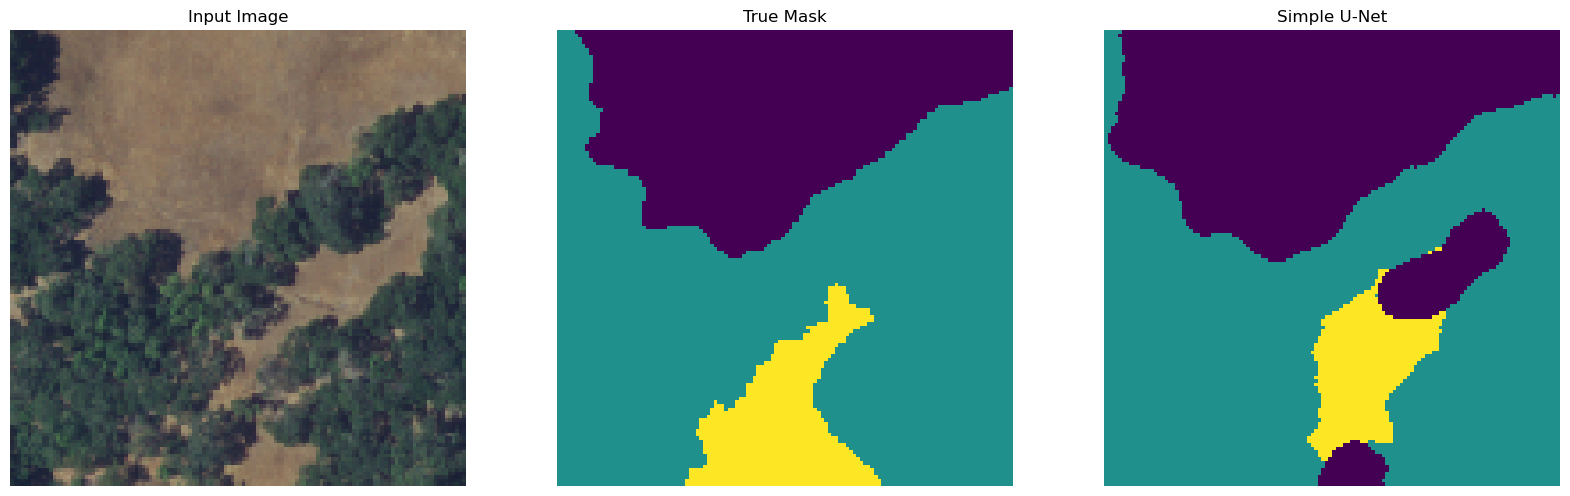

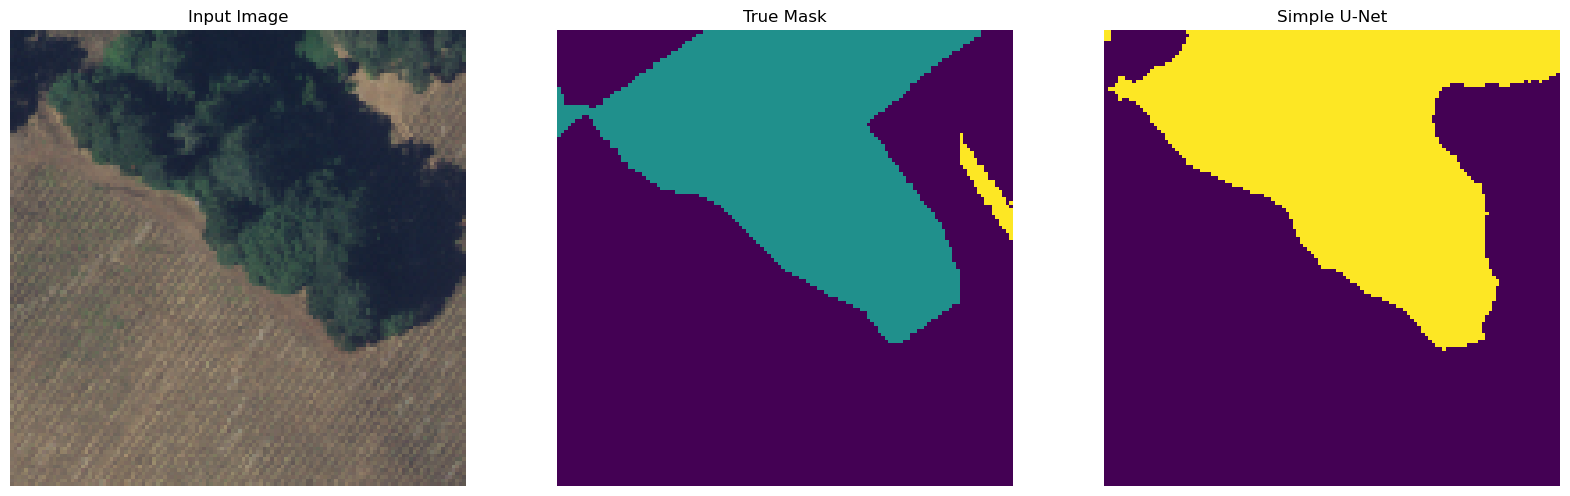

In [59]:
hp.show_predictions(model,test_images[100:103],test_labels[100:103], 2, "Simple U-Net")
del model

In [20]:
keras.backend.clear_session()
model_mobile = hp.mobile_unet_model(output_channels=4)
gc.collect()

39240

In [21]:
gc.collect()

473

In [22]:
model_history_mobile = model_mobile.fit(train_images, train_labels, epochs=50,batch_size=6,
                          validation_data=(test_images, test_labels),
                          callbacks=callbacks)

Epoch 1/50
1488/1488 [==============================] - 38s 24ms/step - loss: 0.9226 - accuracy: 0.6262 - mean_io_u: 0.4325 - val_loss: 0.7943 - val_accuracy: 0.6764 - val_mean_io_u: 0.4718 - lr: 0.0100
Epoch 2/50
1488/1488 [==============================] - 35s 24ms/step - loss: 0.8533 - accuracy: 0.6548 - mean_io_u: 0.4668 - val_loss: 0.9554 - val_accuracy: 0.6257 - val_mean_io_u: 0.4478 - lr: 0.0100
Epoch 3/50
1488/1488 [==============================] - 36s 24ms/step - loss: 0.8263 - accuracy: 0.6678 - mean_io_u: 0.4819 - val_loss: 0.7719 - val_accuracy: 0.6856 - val_mean_io_u: 0.5093 - lr: 0.0100
Epoch 4/50
1488/1488 [==============================] - 36s 24ms/step - loss: 0.8029 - accuracy: 0.6766 - mean_io_u: 0.4930 - val_loss: 0.7853 - val_accuracy: 0.6742 - val_mean_io_u: 0.4969 - lr: 0.0100
Epoch 5/50
1488/1488 [==============================] - 35s 24ms/step - loss: 0.7866 - accuracy: 0.6835 - mean_io_u: 0.5018 - val_loss: 0.7303 - val_accuracy: 0.7104 - val_mean_io_u: 0.546

In [53]:
model_mobile = keras.models.load_model("mobilenet_seg_model_full.tf")

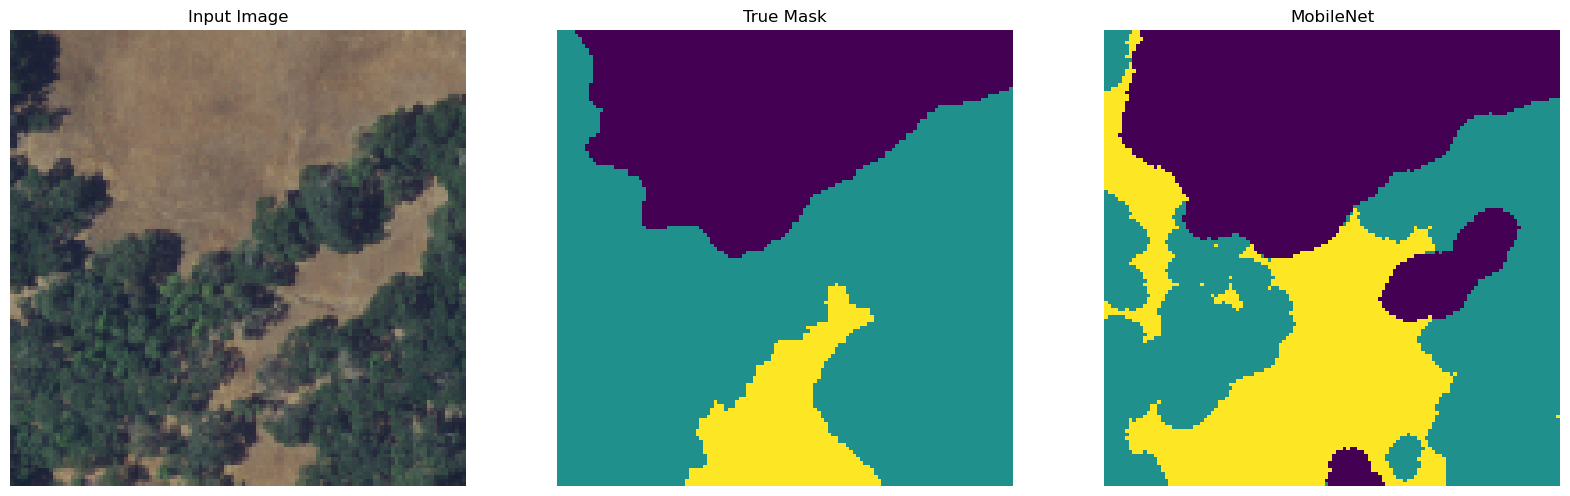

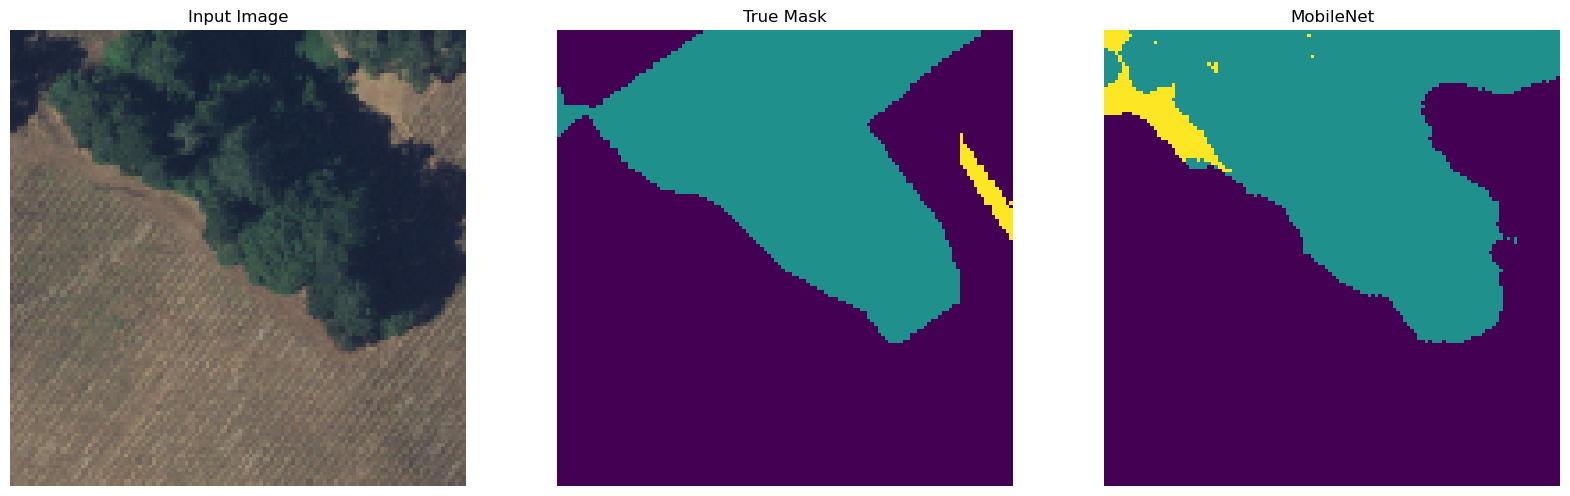

In [58]:
hp.show_predictions(model_mobile,test_images[100:103],test_labels[100:103], 2, "MobileNet")
del model_mobile

In [24]:
model_mobile.save('mobilenet_seg_model_small.h5', overwrite=True)


In [66]:
keras.backend.clear_session()
model_deeplab = hp.DeeplabV3Plus(image_size=128, num_classes=4)
model_deeplab.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [68]:
gc.collect()


473

In [69]:
model_history = model_deeplab.fit(train_images, train_labels, epochs=50,batch_size=12,
                          validation_data=(test_images, test_labels),
                          callbacks=callbacks)

Epoch 1/50
744/744 [==============================] - 47s 58ms/step - loss: 0.8783 - accuracy: 0.6519 - mean_io_u: 0.4610 - val_loss: 2.9343 - val_accuracy: 0.2438 - val_mean_io_u: 0.0619 - lr: 0.0100
Epoch 2/50
744/744 [==============================] - 42s 57ms/step - loss: 0.7923 - accuracy: 0.6801 - mean_io_u: 0.4968 - val_loss: 0.9132 - val_accuracy: 0.6061 - val_mean_io_u: 0.4104 - lr: 0.0100
Epoch 3/50
744/744 [==============================] - 43s 58ms/step - loss: 0.7481 - accuracy: 0.6979 - mean_io_u: 0.5184 - val_loss: 1.6562 - val_accuracy: 0.4483 - val_mean_io_u: 0.2435 - lr: 0.0100
Epoch 4/50
744/744 [==============================] - 42s 57ms/step - loss: 0.7142 - accuracy: 0.7128 - mean_io_u: 0.5374 - val_loss: 1.1512 - val_accuracy: 0.5391 - val_mean_io_u: 0.3570 - lr: 0.0100
Epoch 5/50
744/744 [==============================] - 42s 57ms/step - loss: 0.6999 - accuracy: 0.7180 - mean_io_u: 0.5449 - val_loss: 0.8869 - val_accuracy: 0.6372 - val_mean_io_u: 0.4530 - lr: 0.

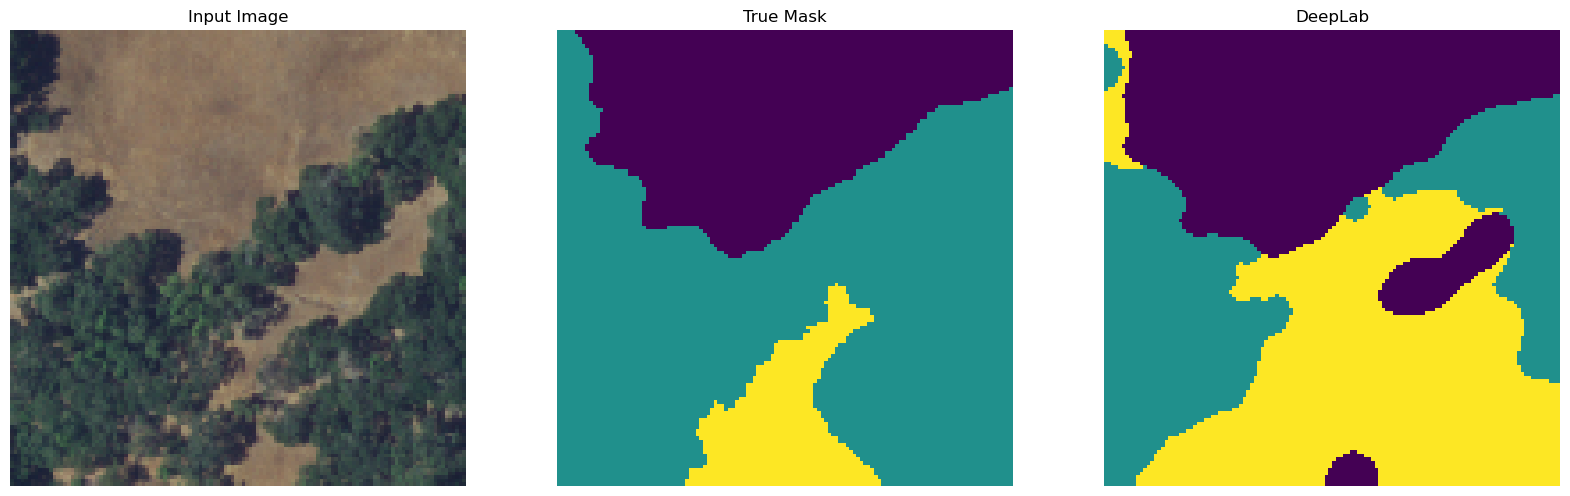

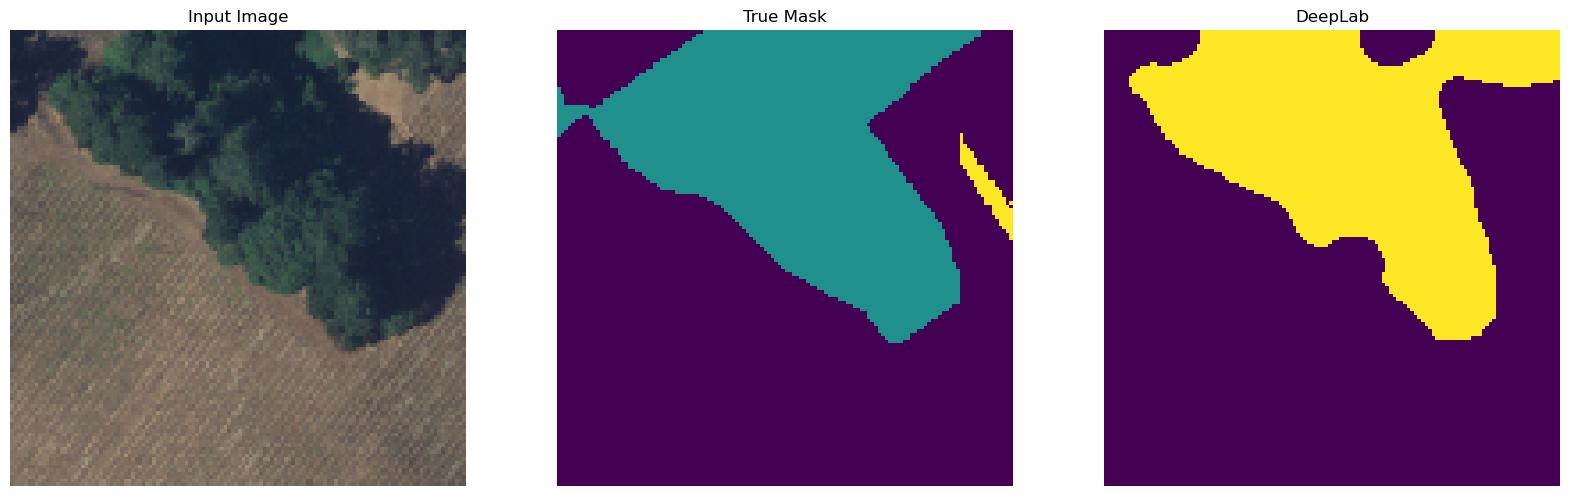

In [70]:
hp.show_predictions(model_deeplab,test_images[100:103],test_labels[100:103], 2,"DeepLab")

In [71]:
model_deeplab.save('deeplabv3_seg_model.tf')

INFO:tensorflow:Assets written to: deeplabv3_seg_model.tf\assets


INFO:tensorflow:Assets written to: deeplabv3_seg_model.tf\assets


In [42]:
test_images.shape

(2977, 128, 128, 3)

deeplabv3_seg_model.tf
0.6023973
mobilenet_seg_model_full.tf
0.5391526
simple_seg_model.h5
0.59713554
s_voting
0.60998064


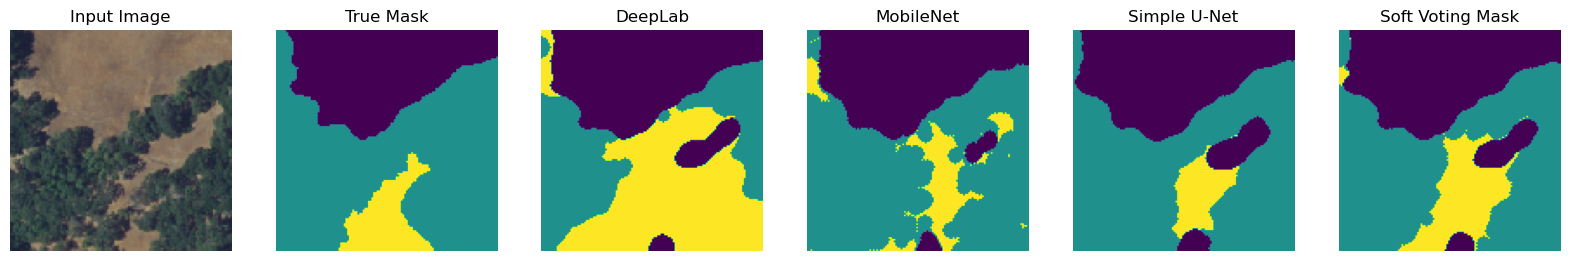

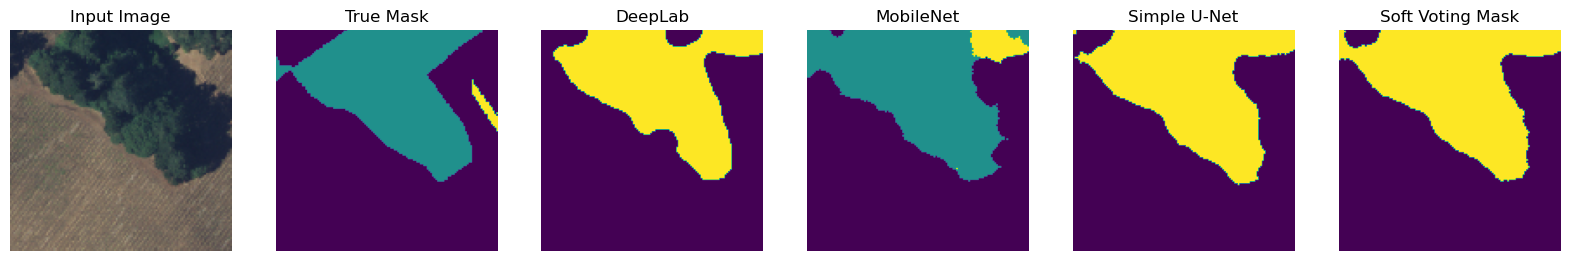

In [82]:
hp.voting(['deeplabv3_seg_model.tf','mobilenet_seg_model_full.tf', 'simple_seg_model.h5' ],test_images,test_labels,offset = 100, num =2)

In [80]:
hp.voting(['deeplabv3_seg_model_full.h5','mobilenet_seg_model_softmax.h5', 'simple_seg_model_softmax.h5' ],test_images[0:2000],test_labels[0:2000],offset =225)

OSError: No file or directory found at deeplabv3_seg_model_full.h5